# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

E-news Express is an online neews portal with a goal of expanding it's user base. The E-news Express Design team has created a new landing page in hopes of achieving a higher conversion rate than the existing landing page.  

The E-news Express Data Science team conducted a random sampling of 100 users dividing them equally into two groups: the control group which experiences the exisitng landing page, and the treatment group which experiences the new landing page. 

The below analysis is to determine if the new landing page is more effective at converting new users to subscribers. All of the statistical analysis included below has a significance level of 5%. 

Data Dictionary
The dataset contains the following categorical and continuous rows:

*   user_id: Unique ID of the user
*   group: identify if the user was part of the controll or treatment group.
*   landing_page: Indicates if the user experienced the new or old landing page.
*   time_spent_on_the_page
*   converted: refers to the users who visit the landing page and get converted
*   language_preferred







## Import all the necessary libraries

In [76]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import libraries for statistical analysis
import scipy.stats as stats



In [77]:
!pip install scipy --upgrade --user

## Reading the Data into a DataFrame

In [ ]:
# allow Colab to access my Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project2/abtest.csv')
# copy the dataframe to prevent change to the original data
df=data.copy()


## Explore the dataset and extract insights using Exploratory Data Analysis

In [ ]:
# return the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish




*   List item




In [ ]:
# check the shape of the data
df.shape

(100, 6)

*   There are 100 rows and 6 columns in this dataset.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB




*   There are two integer type columns and 4 categorical columns. 
*   Since time spent on the page is the only relevant numerical column, the initial EDA will be light on visualization or descriptive statisitcs. 





In [ ]:
# return a statistical summary of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71




*   The average time spent on ENews website is 5.38 minutes. 
*   The median time spent was 5.41 minutes, slighlty higher than the mean, but this sample will still be considered a normal distribution. 



In [ ]:
# check for any missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
# check for duplicates
df.duplicated().sum()

0



*   There is no missing information, and no duplicates. 
*   This means that our sample does not include any repeat users and we can continue with our 100 users sample. 



### Univariate Analysis

In [ ]:
#value counts for group
print("The count in each test group is")
print(df.group.value_counts())
#value counts for landing page
print("The number of users experiencing each landing page")
print(df.landing_page.value_counts())

The count in each test group is
control      50
treatment    50
Name: group, dtype: int64
The number of users experiencing each landing page
old    50
new    50
Name: landing_page, dtype: int64




*   Both the group and landing page column are bimodial with an even count of users in the control group seeing the old site, and treatment group using te new site. 
*   Since these columns are essentially identical information, moving forward we will use the landing page column for bivariate analysis and hypothesis testing. 



In [ ]:
#value counts for converted
df.converted.value_counts()

yes    54
no     46
Name: converted, dtype: int64


*   The conversion rates can be converted to the following proportions:
    *   Converted proportion 54:100
    *   Unconverted proportion 46:100
*   While the converted group is a larger proportion, there is still room for improvement as the business case indicates.

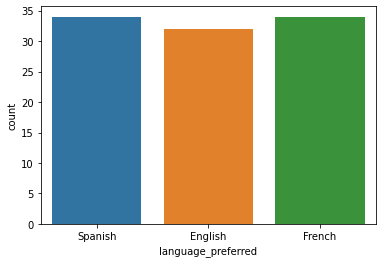

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64


In [ ]:
#create a countplot with seaborn to show preferred language
sns.countplot(data=df, x='language_preferred');
plt.show()
# value counts for different languages
print(df.language_preferred.value_counts())


*   There is a fairly equal distribution between users preferring Spanish, English, and French languages while using the ENews Express site. 
*   Further analysis will be needed to see if the language groups were evenly distributed through the control and treatment groups. 



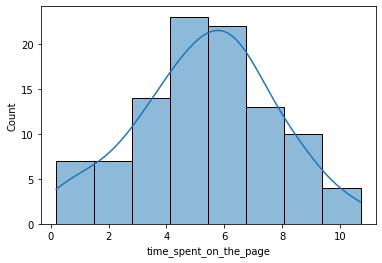

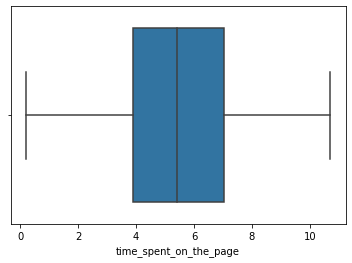

In [ ]:
#create a histplot with seaborn for time spent on the page
sns.histplot(df, x='time_spent_on_the_page', kde='True');
plt.show()
#create a boxplot with seaborn for the time spent on the page
sns.boxplot(data=df, x='time_spent_on_the_page');
plt.show()



*   The time spent on the page is uniform and does not show any outliers to skew the data.
*   The quartile range indicates users spent between 3.88 to 7.02 minutes on the site.





### Bivariate Analysis

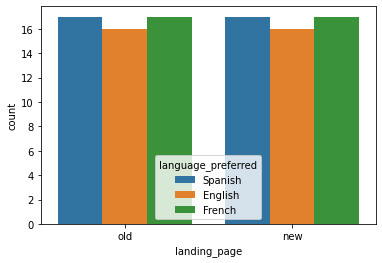

In [ ]:
sns.countplot(data=df, x='landing_page', hue='language_preferred')

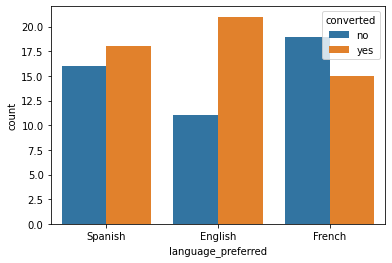

In [ ]:
sns.countplot(data=df, x='language_preferred', hue='converted');
plt.show()

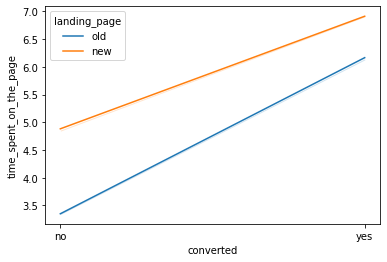

In [ ]:
sns.lineplot(data=df, x='converted', y='time_spent_on_the_page', hue='landing_page', ci=False);
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

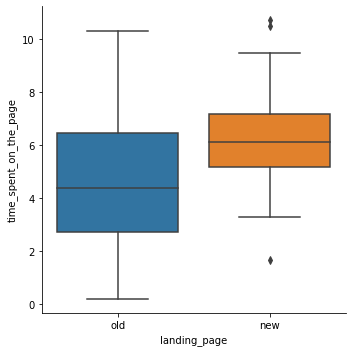

In [ ]:
sns.catplot(data=df, y='time_spent_on_the_page', x='landing_page', kind='box');
plt.show()

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as: 

  $H_0$: The average time spent on the existing landing page and new landing page are equal.

  $H_a$: The average time spent on the new landing page is greater than the existing landing page. 

Alternatively, this can be formulated as:

  $H_0$: $μ_1$ = $μ_2$ 

  $H_a$: $μ_1$ <  $μ_2$

### Step 2: Select Appropriate test

This hypothesis consists of two independent samples with a normal distribution based on the Central Limit Theorem. We also do not know the population's standard deviations.

Based on these facts, the appropriate test would be a two sample t-test. 

### Step 3: Decide the significance level

The business case included with this data set provides a a level of significance of .05.

### Step 4: Collect and prepare data

In [ ]:
# DO I NEED TO CREATE COLUMNS FOR JUST OLD/TIME AND NEW/TIME?
new_page_time=df[df['landing_page']=='new']['time_spent_on_the_page']
#
old_page_time=df[df['landing_page']=='old']['time_spent_on_the_page']
df['new_page_time']=new_page_time
df['old_page_time']=old_page_time

In [ ]:
print('The sample standard deviation for the new page is:', round(new_page_time.std(),2))
print('The sample standard deviation for the old page is:', round(old_page_time.std(),2))

The sample standard deviation for the new page is: 1.82
The sample standard deviation for the old page is: 2.58


### Step 5: Calculate the p-value

In [ ]:
# Import the function necessary to conduct a 2 Sample T-test for equality of means
from scipy.stats import ttest_ind

test_stat, p_value=ttest_ind(new_page_time, old_page_time, equal_var=False, alternative='greater')


TypeError: ignored

### Step 6: Compare the p-value with $\alpha$

### Step 7:  Draw inference

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

The null and alternative hypotheses can be formulated as: 

$H_0$: The mean conversion rate for the existing landing page is the same as the new landing page. 

$H_a$: The mean conversion rate for the new landing page is greater than the old landing page. 

Alternatively, this can be formulated as:

  $H_0$: $μ_1$ = $μ_2$ 

  $H_a$: $μ_1$ <  $μ_2$

#WHAT TYPE OF TEST IS THIS? 
For this question we will be using a two sample t test again as we are continuing to work with two samples, from indepedent and normal distribution data with unknown population standard deviations. 

In [ ]:
new_converted=df[df['group']=='treatment']['converted'].value_counts()['yes']

old_converted=df[df['group']=='control']['converted'].value_counts()['yes']

n_control=df.group.value_counts()['control']
n_treatment=df.group.value_counts()['treatment']

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

test_stat2, p_value2=proportions_ztest([new_converted, old_converted],[n_treatment, n_control], alternative='greater')

ValueError: ignored

## 3. Is the conversion and preferred language independent or related?

The null and alternative hypotheses can be formulated as: 

$H_0$: The conversion rate and preferred language are independent.

$H_a$: The conversion rate and preferred language are dependent. 

In [ ]:
contingency_table=pd.crosstab(df['language_preferred'], df['converted'])

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


In [ ]:

from scipy.stats import chi2_contingency

chi2, p_value3, dof, exp_freq=chi2_contingency(contingency_table)
print("The p_value is,", p_value3)

The p_value is, 0.2129888748754345


## 4. Is the time spent on the new page same for the different language users?

The null and alternative hypotheses can be formulated as: 

$H_0$: The mean time spent on the new page is the same for English, Spanish, and French language users. 

$H_a$: At least one of the preferred language as a different mean time spent than the other languages. 


## Conclusion and Business Recommendations

___